In [1]:
#import
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import pymysql
import operator
import math
import os
from scipy import stats
from statsmodels.regression.linear_model import OLS
from datetime import *
import scipy.io as sio
import h5py
import copy
import shutil
import rarfile
from general_function import *
import scipy.stats as scs
from matplotlib_venn import venn3
from matplotlib_venn import venn2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号
sns.set(style="whitegrid")
myfont = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=10)
sns.set(
    font=myfont.get_name(),
    style="whitegrid",
    palette="muted",
    color_codes=True)
import cvxpy as cp

In [2]:
#data
os.chdir(r'C:\Users\bj\Desktop\刘泽丹\Code')
industry_full = pd.read_excel('sw_industry_full.xlsx',index_col = 0)
industry_full.index = [pd.datetime.strptime(str(i),'%Y%m%d') for i in industry_full.index]
industry_list = industry_full.iloc[0].dropna().unique().tolist() + ['现金']
zz500members = pd.read_csv('zz500members.csv',index_col=0).T
zz500members.index = zz500members.index.astype(int)
zz500members.index = [pd.datetime.strptime(str(i),'%Y%m%d') for i in zz500members.index]
zzIcData = pd.read_csv('zz500_from_db.csv')
zzIcData.columns = [int(i) for i in zzIcData.columns]
zzIcData[1] = [pd.datetime.strptime(str(date.fromordinal(int(i)-366)),'%Y-%m-%d') for i in zzIcData[1]]
zzIcData.set_index(1,inplace=True)
full = pd.read_csv('full_data_for_generator_from_db.csv')
full.columns = [int(i) for i in full.columns]
full[0] = [int(i) for i in full[0]]
full[4] = [pd.datetime.strptime(str(date.fromordinal(int(i)-366)),'%Y-%m-%d') for i in full[4]]
full.set_index([0,4],inplace=True)
os.chdir(r'F:\金湖回测系统\股票数据')
STcode_by_date = pd.read_csv('STcode_by_date.csv',index_col=0)
STcode_by_date = STcode_by_date[STcode_by_date.index>=20170101]
STcode_by_date.index = [pd.datetime.strptime(str(i),'%Y%m%d') for i in STcode_by_date.index]
def process_co(df):
    return df[5]/df[8].shift(1)-1
co = full.groupby(level=0).apply(process_co)
co.index = co.index.droplevel(0)
co.name = 0
def process_oc(df):
    return df[8]/df[5]-1
oc = full.groupby(level=0).apply(process_oc)
oc.index = oc.index.droplevel(0)
oc.name = 0
def process_cc(df):
    return df[8]/df[8].shift(1)-1
cc = full.groupby(level=0).apply(process_cc)
cc.index = cc.index.droplevel(0)
cc.name = 0
def process_ch(df):
    return df[6]/df[8].shift(1)-1
ch = full.groupby(level=0).apply(process_ch)
ch.index = ch.index.droplevel(0)
ch.name = 0
def process_amount(df):
    return df[10]
amount = full.groupby(level=0).apply(process_amount)
amount.index = amount.index.droplevel(0)
amount.name = 0
def process_amount(df):
    return df[10].shift(1)
shifted_amount = full.groupby(level=0).apply(process_amount)
shifted_amount.index = shifted_amount.index.droplevel(0)
shifted_amount.name = 0
cc_l = cc.copy()
cc_l[ch>0.07] = 0.07
cc_l[(co>0.07)&(ch>0.07)] = co[(co>0.07)&(ch>0.07)]
all_stock_return_cc = cc.unstack().T.dropna(how = 'all')
all_stock_return_oc = oc.unstack().T.dropna(how = 'all')

In [3]:
#read
os.chdir(r'C:\Users\bj\Desktop\刘泽丹\Code')
dateparser = lambda x:pd.datetime.strptime(str(x),'%Y-%m-%d')
AGG_BETA = pd.read_csv('AGG_BETA.csv',index_col=0, date_parser=dateparser)
AGG_BETA.columns = AGG_BETA.columns.astype(int)
AGG_SIZE = pd.read_csv('AGG_SIZE.csv',index_col=0, date_parser=dateparser)
AGG_SIZE.columns = AGG_SIZE.columns.astype(int)
AGG_MOMENTUM = pd.read_csv('AGG_MOMENTUM.csv',index_col=0, date_parser=dateparser)
AGG_MOMENTUM.columns = AGG_MOMENTUM.columns.astype(int)
AGG_VOLATILITY = pd.read_csv('AGG_VOLATILITY.csv',index_col=0, date_parser=dateparser)
AGG_VOLATILITY.columns = AGG_VOLATILITY.columns.astype(int)
AGG_NonLinerSize = pd.read_csv('AGG_NonLinerSize.csv',index_col=0, date_parser=dateparser)
AGG_NonLinerSize.columns = AGG_NonLinerSize.columns.astype(int)
AGG_VALUE = pd.read_csv('AGG_VALUE.csv',index_col=0, date_parser=dateparser)
AGG_VALUE.columns = AGG_VALUE.columns.astype(int)
AGG_LIQUIDITY = pd.read_csv('AGG_LIQUIDITY.csv',index_col=0, date_parser=dateparser)
AGG_LIQUIDITY.columns = AGG_LIQUIDITY.columns.astype(int)
AGG_PROFITABILITY = pd.read_csv('AGG_PROFITABILITY.csv',index_col=0, date_parser=dateparser)
AGG_PROFITABILITY.columns = AGG_PROFITABILITY.columns.astype(int)
AGG_GROWTH = pd.read_csv('AGG_GROWTH.csv',index_col=0, date_parser=dateparser)
AGG_GROWTH.columns = AGG_GROWTH.columns.astype(int)
AGG_LEVERAGE = pd.read_csv('AGG_LEVERAGE.csv',index_col=0, date_parser=dateparser)
AGG_LEVERAGE.columns = AGG_LEVERAGE.columns.astype(int)
Schimidt_AGG_VOLATILITY = pd.read_csv('Schimidt_AGG_VOLATILITY.csv',index_col=0, date_parser=dateparser)
Schimidt_AGG_VOLATILITY.columns = Schimidt_AGG_VOLATILITY.columns.astype(int)
Schimidt_AGG_LIQUIDITY = pd.read_csv('Schimidt_AGG_LIQUIDITY.csv',index_col=0, date_parser=dateparser)
Schimidt_AGG_LIQUIDITY.columns = Schimidt_AGG_LIQUIDITY.columns.astype(int)

In [4]:
#more data
os.chdir(r'C:\Users\bj\Desktop\刘泽丹\Code')
dateparser = lambda x:pd.datetime.strptime(str(x),'%Y%m%d')
pe_ttm = pd.read_csv('pe_ttm.csv',index_col = 0, date_parser=dateparser)
pe_ttm.columns = pe_ttm.columns.astype(int)
mkt_cap_ard = pd.read_csv('mkt_cap_ard.csv',index_col = 0, date_parser=dateparser)
mkt_cap_ard.columns = mkt_cap_ard.columns.astype(int)
total_shares = pd.read_csv('total_shares.csv',index_col=0, date_parser=dateparser)
total_shares.columns = total_shares.columns.astype(int)
free_float_shares = pd.read_csv('free_float_shares.csv',index_col=0, date_parser=dateparser)
free_float_shares.columns = free_float_shares.columns.astype(int)
free_float_ratio = free_float_shares/total_shares
free_float_mkt_cap = free_float_ratio * mkt_cap_ard

In [5]:
AGG_factor = AGG_BETA - AGG_SIZE - AGG_MOMENTUM + AGG_VOLATILITY - AGG_NonLinerSize + AGG_VALUE - AGG_LIQUIDITY + \
             AGG_PROFITABILITY + AGG_GROWTH + AGG_LEVERAGE

6


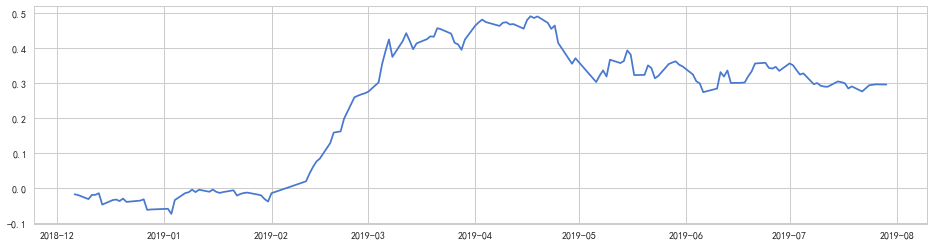

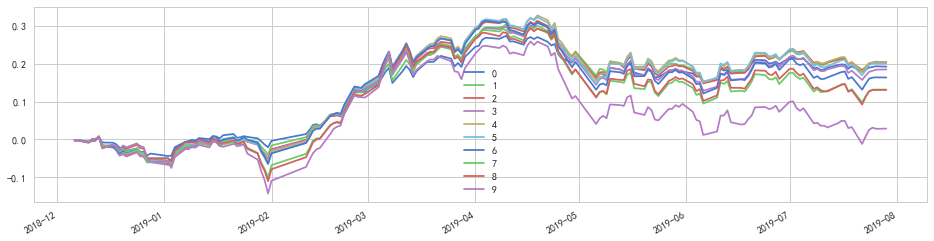

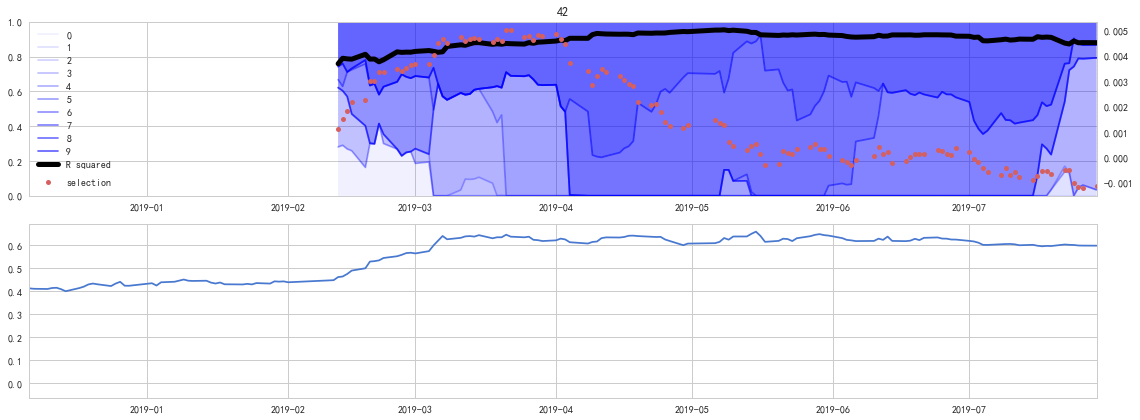

In [45]:
os.chdir(r'F:\金湖回测系统\6日循环\结果存放文件夹')
file = '回测_6_(E2)_5000万_7_50支.xlsx'
checking_factor = AGG_LIQUIDITY.copy()
hold = int(file.replace('最旧','').split('回测_')[1].split('_')[0])
print(hold)
level = 10
test_rolling_period_list = [42]
if True:
    mid = pd.read_excel(file,index_col=0).iloc[-161:,0]
    mid.index = [pd.datetime.strptime(str(i),'%Y%m%d') for i in mid.index]
    data = mid.diff()
    data.iloc[0] = mid.iloc[0]
    data = data.iloc[hold-1:]
    data.name = 'normal'
    plt.figure(figsize = (16,4))
    plt.plot(data.cumsum(),label='normal')
    plt.show()
    #full_return = pd.concat([all_return,data],axis=1).dropna()
    #data = full_return['normal']
    #data = data.iloc[:-1]
    
    level_return = dict()
    level_length = dict()
    for il in range(level):
        level_return[il] = pd.DataFrame()
        level_length[il] = pd.Series(name = il)
    for current_date in data.index:
        if current_date not in checking_factor.index.tolist():
            continue
        sub_all_stock_return = all_stock_return_cc.loc[current_date:].iloc[:hold].copy()
        if hold>1:
            sub_all_stock_return.loc[current_date] = all_stock_return_oc.loc[current_date]
        yesterday_value = checking_factor.shift(1).xs(current_date).loc[sub_all_stock_return.columns].dropna().sort_values()
        for il in range(level):
            level_stock = yesterday_value.iloc[int(len(yesterday_value)*(il/level)):int(len(yesterday_value)*((il+1)/level))].index.tolist()
            level_length[il][current_date] = len(level_stock)
            mid = sub_all_stock_return[level_stock].mean(axis=1)
            mid.name = current_date
            level_return[il] = pd.concat([level_return[il],mid],axis=1)
    return_df = pd.DataFrame()
    length_df = pd.DataFrame()
    for il in range(level):
        level_return[il] = level_return[il].sum(axis=1)/hold
        level_return[il].name = il
        return_df = pd.concat([return_df, level_return[il]],axis=1)
        length_df = pd.concat([length_df, level_length[il]],axis=1)
    return_df = return_df.loc[data.index]
    length_df = length_df.loc[data.index]
    # return_df['cash'] = 0
    # length_df['cash'] = 0
    # return_df['alpha'] = 1
    # length_df['alpha'] = 0
    return_df.iloc[:,:].cumsum().plot(figsize = (16,4))
    plt.show()

    fig = plt.figure(figsize = (16, 3*(len(test_rolling_period_list)+1)))
    ii=0
    for test_rolling_period in test_rolling_period_list:
        ii+=1
        full_Y = pd.DataFrame()
        R2_series = pd.Series()
        selection_series = pd.Series()
        for i in return_df.index.tolist():
            sub_return_df = return_df.loc[:i].iloc[-test_rolling_period:]
            sub_data = data.loc[:i].iloc[-test_rolling_period:]
            if len(sub_return_df) < test_rolling_period:
                continue
            X = np.array(sub_return_df)
            Y = cp.Variable(len(list(sub_return_df)))
            target_X = np.array(sub_data)
            #prob = cp.Problem(cp.Minimize(cp.sum_squares(X * Y - target_X)),
            #             [Y >= 0, Y@ np.array([1]*(len(list(sub_return_df)))) == 1])
            prob = cp.Problem(cp.Minimize(cp.norm(X * Y - target_X)),
                         [Y >= 0, Y@ np.array([1]*(len(list(sub_return_df)))) == 1])
            prob.solve()
            daily_result = pd.Series(Y.value, name = i)
            full_Y = pd.concat([full_Y,daily_result],axis=1)
            R2_series[i] = 1-(((pd.DataFrame(X * Y.value).sum(axis=1)) - sub_data.reset_index(drop=True)).std()/\
                              sub_data.reset_index(drop=True).std())**2
            selection_series[i] = (sub_data.reset_index(drop=True) - (pd.DataFrame(X * Y.value).sum(axis=1))).mean()
            #OLS(sub_data.reset_index(drop=True), pd.DataFrame(X * Y.value).sum(axis=1)).fit().rsquared
        full_Y = full_Y.T
        cum_full_Y = full_Y.cumsum(axis=1)
        space = pd.Series(0,name = ' ', index = cum_full_Y.index)
        cum_full_Y = pd.concat([space,cum_full_Y],axis=1)
        ax = fig.add_subplot((len(test_rolling_period_list)+1)*100+10+ii)
        for index,value in enumerate(list(cum_full_Y)):
            if index == 0:
                continue
            ax.plot(cum_full_Y[value], color = 'blue', alpha = index/(len(list(cum_full_Y))*1.5))
            ax.fill_between(cum_full_Y.index, cum_full_Y[list(cum_full_Y)[index-1]], cum_full_Y[value],\
                             color = 'blue', alpha = index/(len(list(cum_full_Y))*1.5), linestyle ='dotted')
        ax.set_ylim(0,1)
        ax.set_xlim(return_df.index.tolist()[0],return_df.index.tolist()[-1])
        ax.plot(R2_series,'black',label='R squared',lw=5)
        ax.legend(loc=2)
        ax.set_title(test_rolling_period)
        ax_ = ax.twinx()
        ax_.plot(selection_series,'r.',label='selection',ms = 10)
        ax_.grid()
        ax_.legend(loc=3)
    ax = fig.add_subplot((len(test_rolling_period_list)+1)*100+10+(len(test_rolling_period_list)+1))
    os.chdir(r'F:\金湖回测系统\6日循环\结果存放文件夹')
    plot_mid = pd.read_excel(file,index_col=0).iloc[:,1]
    plot_mid.index = [pd.datetime.strptime(str(i),'%Y%m%d') for i in plot_mid.index]
    plot_data = plot_mid.diff()
    plot_data.iloc[0] = plot_mid.iloc[0]
    plot_data = plot_data.iloc[int(file.replace('最旧','').split('回测_')[1].split('_')[0])-1:]
    ax.plot(plot_data.cumsum())
    ax.set_xlim(return_df.index.tolist()[0],return_df.index.tolist()[-1])
    plt.tight_layout()
    plt.show()

9


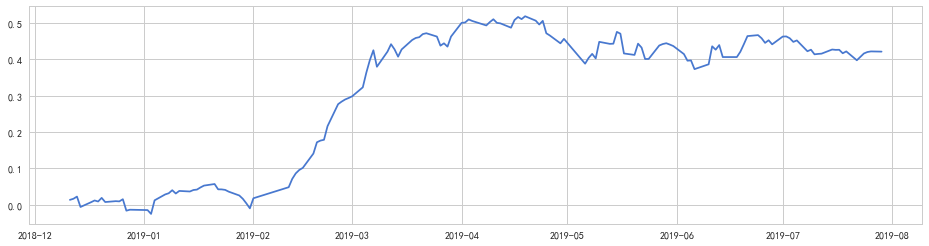

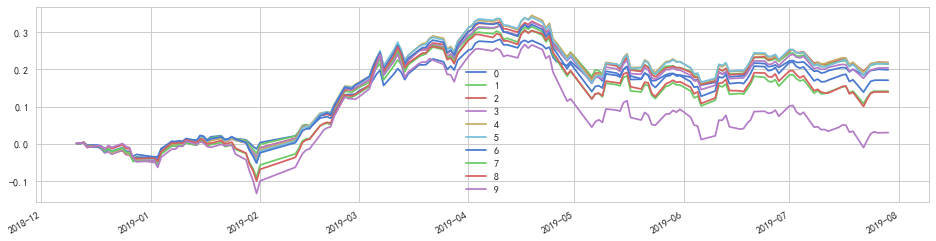

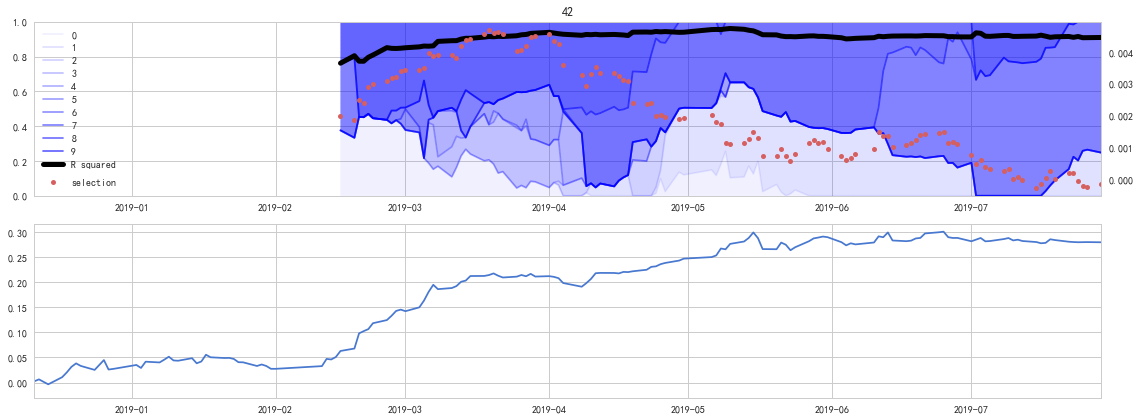

In [46]:
os.chdir(r'F:\金湖回测系统\6日循环\结果存放文件夹')
file = '回测_9_(I2)_5000万_7_50支.xlsx'
checking_factor = AGG_LIQUIDITY.copy()
hold = int(file.replace('最旧','').split('回测_')[1].split('_')[0])
print(hold)
level = 10
test_rolling_period_list = [42]
if True:
    mid = pd.read_excel(file,index_col=0).iloc[-161:,0]
    mid.index = [pd.datetime.strptime(str(i),'%Y%m%d') for i in mid.index]
    data = mid.diff()
    data.iloc[0] = mid.iloc[0]
    data = data.iloc[hold-1:]
    data.name = 'normal'
    plt.figure(figsize = (16,4))
    plt.plot(data.cumsum(),label='normal')
    plt.show()
    #full_return = pd.concat([all_return,data],axis=1).dropna()
    #data = full_return['normal']
    #data = data.iloc[:-1]
    
    level_return = dict()
    level_length = dict()
    for il in range(level):
        level_return[il] = pd.DataFrame()
        level_length[il] = pd.Series(name = il)
    for current_date in data.index:
        if current_date not in checking_factor.index.tolist():
            continue
        sub_all_stock_return = all_stock_return_cc.loc[current_date:].iloc[:hold].copy()
        if hold>1:
            sub_all_stock_return.loc[current_date] = all_stock_return_oc.loc[current_date]
        yesterday_value = checking_factor.shift(1).xs(current_date).loc[sub_all_stock_return.columns].dropna().sort_values()
        for il in range(level):
            level_stock = yesterday_value.iloc[int(len(yesterday_value)*(il/level)):int(len(yesterday_value)*((il+1)/level))].index.tolist()
            level_length[il][current_date] = len(level_stock)
            mid = sub_all_stock_return[level_stock].mean(axis=1)
            mid.name = current_date
            level_return[il] = pd.concat([level_return[il],mid],axis=1)
    return_df = pd.DataFrame()
    length_df = pd.DataFrame()
    for il in range(level):
        level_return[il] = level_return[il].sum(axis=1)/hold
        level_return[il].name = il
        return_df = pd.concat([return_df, level_return[il]],axis=1)
        length_df = pd.concat([length_df, level_length[il]],axis=1)
    return_df = return_df.loc[data.index]
    length_df = length_df.loc[data.index]
    # return_df['cash'] = 0
    # length_df['cash'] = 0
    # return_df['alpha'] = 1
    # length_df['alpha'] = 0
    return_df.iloc[:,:].cumsum().plot(figsize = (16,4))
    plt.show()

    fig = plt.figure(figsize = (16, 3*(len(test_rolling_period_list)+1)))
    ii=0
    for test_rolling_period in test_rolling_period_list:
        ii+=1
        full_Y = pd.DataFrame()
        R2_series = pd.Series()
        selection_series = pd.Series()
        for i in return_df.index.tolist():
            sub_return_df = return_df.loc[:i].iloc[-test_rolling_period:]
            sub_data = data.loc[:i].iloc[-test_rolling_period:]
            if len(sub_return_df) < test_rolling_period:
                continue
            X = np.array(sub_return_df)
            Y = cp.Variable(len(list(sub_return_df)))
            target_X = np.array(sub_data)
            #prob = cp.Problem(cp.Minimize(cp.sum_squares(X * Y - target_X)),
            #             [Y >= 0, Y@ np.array([1]*(len(list(sub_return_df)))) == 1])
            prob = cp.Problem(cp.Minimize(cp.norm(X * Y - target_X)),
                         [Y >= 0, Y@ np.array([1]*(len(list(sub_return_df)))) == 1])
            prob.solve()
            daily_result = pd.Series(Y.value, name = i)
            full_Y = pd.concat([full_Y,daily_result],axis=1)
            R2_series[i] = 1-(((pd.DataFrame(X * Y.value).sum(axis=1)) - sub_data.reset_index(drop=True)).std()/\
                              sub_data.reset_index(drop=True).std())**2
            selection_series[i] = (sub_data.reset_index(drop=True) - (pd.DataFrame(X * Y.value).sum(axis=1))).mean()
            #OLS(sub_data.reset_index(drop=True), pd.DataFrame(X * Y.value).sum(axis=1)).fit().rsquared
        full_Y = full_Y.T
        cum_full_Y = full_Y.cumsum(axis=1)
        space = pd.Series(0,name = ' ', index = cum_full_Y.index)
        cum_full_Y = pd.concat([space,cum_full_Y],axis=1)
        ax = fig.add_subplot((len(test_rolling_period_list)+1)*100+10+ii)
        for index,value in enumerate(list(cum_full_Y)):
            if index == 0:
                continue
            ax.plot(cum_full_Y[value], color = 'blue', alpha = index/(len(list(cum_full_Y))*1.5))
            ax.fill_between(cum_full_Y.index, cum_full_Y[list(cum_full_Y)[index-1]], cum_full_Y[value],\
                             color = 'blue', alpha = index/(len(list(cum_full_Y))*1.5), linestyle ='dotted')
        ax.set_ylim(0,1)
        ax.set_xlim(return_df.index.tolist()[0],return_df.index.tolist()[-1])
        ax.plot(R2_series,'black',label='R squared',lw=5)
        ax.legend(loc=2)
        ax.set_title(test_rolling_period)
        ax_ = ax.twinx()
        ax_.plot(selection_series,'r.',label='selection',ms = 10)
        ax_.grid()
        ax_.legend(loc=3)
    ax = fig.add_subplot((len(test_rolling_period_list)+1)*100+10+(len(test_rolling_period_list)+1))
    os.chdir(r'F:\金湖回测系统\6日循环\结果存放文件夹')
    plot_mid = pd.read_excel(file,index_col=0).iloc[:,1]
    plot_mid.index = [pd.datetime.strptime(str(i),'%Y%m%d') for i in plot_mid.index]
    plot_data = plot_mid.diff()
    plot_data.iloc[0] = plot_mid.iloc[0]
    plot_data = plot_data.iloc[int(file.replace('最旧','').split('回测_')[1].split('_')[0])-1:]
    ax.plot(plot_data.cumsum())
    ax.set_xlim(return_df.index.tolist()[0],return_df.index.tolist()[-1])
    plt.tight_layout()
    plt.show()

In [ ]:
os.chdir(r'F:\金湖回测系统\6日循环\结果存放文件夹')
file = '回测_9_(I3)_5000万_7_50支.xlsx'
stock_file = '9_首组_I3_5000万_7_50_支_股票池.csv'
checking_factor = AGG_LIQUIDITY.copy()
hold = int(file.replace('最旧','').split('回测_')[1].split('_')[0])
print(hold)
level = 10
if True:
    mid = pd.read_excel(file,index_col=0).iloc[:,0]
    mid.index = [pd.datetime.strptime(str(i),'%Y%m%d') for i in mid.index]
    data = mid.diff()
    data.iloc[0] = mid.iloc[0]
    data = data.iloc[hold-1:]
    data.name = 'normal'
    
    stock_data = pd.read_csv(open(stock_file),index_col=0)
    stock_data.index = [pd.datetime.strptime(str(i),'%Y%m%d') for i in stock_data.index]
    
    portfolio_factor = pd.Series()
    
    level_factor = dict()
    level_return = dict()
    level_length = dict()
    for il in range(level):
        level_factor[il] = pd.DataFrame()
        level_return[il] = pd.DataFrame()
        level_length[il] = pd.Series(name = il)
    for current_date in data.index:
        if current_date not in checking_factor.index.tolist():
            continue
        sub_all_stock_return = all_stock_return_cc.loc[current_date:].iloc[:hold].copy()
        if hold>1:
            sub_all_stock_return.loc[current_date] = all_stock_return_oc.loc[current_date]
        yesterday_value = checking_factor.shift(1).xs(current_date).loc[sub_all_stock_return.columns].dropna().sort_values()
        portfolio_factor.loc[current_date] = yesterday_value.loc[stock_data.xs(current_date)].mean()
        for il in range(level):
            level_stock = yesterday_value.iloc[int(len(yesterday_value)*(il/level)):int(len(yesterday_value)*((il+1)/level))].index.tolist()
            level_length[il][current_date] = len(level_stock)
            mid = pd.Series([yesterday_value.iloc[int(len(yesterday_value)*(il/level)):int(len(yesterday_value)*((il+1)/level))].mean()], \
                               index = [current_date], name = il)
            level_factor[il] = pd.concat([level_factor[il],mid])
            mid = sub_all_stock_return[level_stock].mean(axis=1)
            mid.name = current_date
            level_return[il] = pd.concat([level_return[il],mid],axis=1)
    factor_df = pd.DataFrame()
    return_df = pd.DataFrame()
    length_df = pd.DataFrame()
    for il in range(level):
        level_return[il] = level_return[il].sum(axis=1)/hold
        level_return[il].name = il
        level_factor[il].name = il
        factor_df = pd.concat([factor_df, level_factor[il]],axis=1)
        return_df = pd.concat([return_df, level_return[il]],axis=1)
        length_df = pd.concat([length_df, level_length[il]],axis=1)
    factor_df = factor_df.loc[data.index]
    return_df = return_df.loc[data.index]
    length_df = length_df.loc[data.index]

9


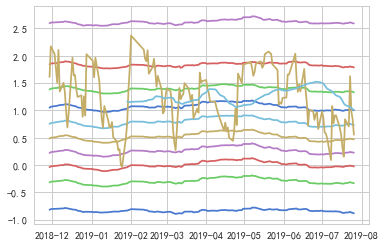

In [64]:
plt.plot(factor_df)
plt.plot(portfolio_factor)
plt.plot(portfolio_factor.rolling(window = 42).mean())
plt.show()

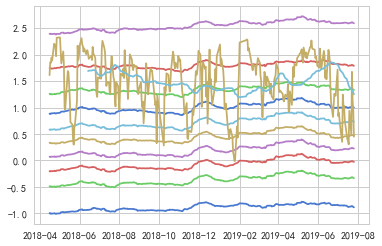

In [62]:
plt.plot(factor_df)
plt.plot(portfolio_factor)
plt.plot(portfolio_factor.rolling(window = 42).mean())
plt.show()

In [ ]:
AGG_BETA - AGG_SIZE - AGG_MOMENTUM + AGG_VOLATILITY - AGG_NonLinerSize + AGG_VALUE - AGG_LIQUIDITY + \
             AGG_PROFITABILITY + AGG_GROWTH + AGG_LEVERAGE

In [ ]:
os.chdir(r'F:\金湖回测系统\6日循环\结果存放文件夹')
file = '回测_6_(E2)_5000万_7_50支.xlsx'
checking_factor = AGG_VOLATILITY.copy()
hold = int(file.replace('最旧','').split('回测_')[1].split('_')[0])
level = 5
if True:
    mid = pd.read_excel(file,index_col=0).iloc[:,0]
    mid.index = [pd.datetime.strptime(str(i),'%Y%m%d') for i in mid.index]
    data = mid.diff()
    data.iloc[0] = mid.iloc[0]
    data = data.iloc[hold-1:]
    data.name = 'normal'
    data = data.iloc[-42:]
    
    level_return = dict()
    level_length = dict()
    for il in range(level):
        level_return[il] = pd.DataFrame()
        level_length[il] = pd.Series(name = il)
    for current_date in data.index:
        if current_date not in checking_factor.index.tolist():
            continue
        sub_all_stock_return = all_stock_return_cc.loc[current_date:].iloc[:hold].copy()
        if hold>1:
            sub_all_stock_return.loc[current_date] = all_stock_return_oc.loc[current_date]
        yesterday_value = checking_factor.shift(1).xs(current_date).loc[sub_all_stock_return.columns].dropna().sort_values()
        for il in range(level):
            level_stock = yesterday_value.iloc[int(len(yesterday_value)*(il/level)):int(len(yesterday_value)*((il+1)/level))].index.tolist()
            level_length[il][current_date] = len(level_stock)
            mid = sub_all_stock_return[level_stock].mean(axis=1)
            mid.name = current_date
            level_return[il] = pd.concat([level_return[il],mid],axis=1)
    return_df = pd.DataFrame()
    length_df = pd.DataFrame()
    for il in range(level):
        level_return[il] = level_return[il].sum(axis=1)/hold
        level_return[il].name = il
        return_df = pd.concat([return_df, level_return[il]],axis=1)
        length_df = pd.concat([length_df, level_length[il]],axis=1)
    return_df.iloc[:,:].cumsum().plot(figsize = (14,4))
    plt.show()

    sub_return_df = return_df.iloc[-20:]
    sub_data = data.iloc[-20:]
    #print(sub_return_df.index.tolist()[0],'~',sub_return_df.index.tolist()[-1])
    #print(sub_return_df.std())
    #print(sub_return_df.corr())
    X = np.array(sub_return_df)
    Y = cp.Variable(len(list(sub_return_df)))
    target_X = np.array(sub_data)
    #prob = cp.Problem(cp.Minimize(cp.sum_squares(X * Y - target_X)),
    #                 [Y >= 0, Y@ np.array([1]*(len(list(sub_return_df)))) <= 1])
    prob = cp.Problem(cp.Minimize(cp.norm(X * Y - target_X)),
                     [Y >= 0, Y@ np.array([1]*(len(list(sub_return_df)))) <= 1])
    prob.solve()
    plt.bar(range(len(list(sub_return_df))),Y.value)
    plt.show()
    a = pd.DataFrame(X * Y.value).sum(axis=1).cumsum()
    a.plot(label='高换手')
    sub_data.reset_index(drop=True).cumsum().plot(label = '模型')
    ((sub_data.reset_index(drop=True)).cumsum()-a).plot(label='差')
    plt.legend()
    plt.show()
    plt.plot(pd.DataFrame(X * Y.value).sum(axis=1), sub_data.reset_index(drop=True), 'r.')
    plt.show()
    print('std: ',(sub_data.reset_index(drop=True) - (pd.DataFrame(X * Y.value).sum(axis=1))).std())
    print('mean:',(sub_data.reset_index(drop=True) - (pd.DataFrame(X * Y.value).sum(axis=1))).mean())
    print('R2:  ',1-(((pd.DataFrame(X * Y.value).sum(axis=1)) - sub_data.reset_index(drop=True)).std()/sub_data.reset_index(drop=True).std())**2)
    OLS(sub_data.reset_index(drop=True), pd.DataFrame(X * Y.value).sum(axis=1)).fit().summary()

In [ ]:
AGG_BETA - AGG_SIZE - AGG_MOMENTUM + AGG_VOLATILITY - AGG_NonLinerSize + AGG_VALUE - AGG_LIQUIDITY + \
             AGG_PROFITABILITY + AGG_GROWTH + AGG_LEVERAGE

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
os.chdir(r'F:\金湖回测系统\6日循环\结果存放文件夹')
beta_list = [];size_list = [];momentum_list = [];volatility_list = [];NonLinerSize_list = []
value_list = [];liquidity_list = [];profitability_list = [];growth_list = [];leverage_list = []
for filename in ['12_首组_handout_7.0_12_v3_1_1671_1766_5000万_7_50_支_股票池.csv']:
    n_hold = int(filename.split('_')[0])
    buy_num = int(filename.split('_支')[0].split('_')[-1])
    dateparser = lambda x:pd.datetime.strptime(str(x),'%Y%m%d')
    portfolio_record = pd.read_csv(open(filename),index_col=0,date_parser=dateparser)
    normal_active_industry_full = pd.DataFrame()
    normal_bhb_full = pd.DataFrame()
    normal_bf_full = pd.DataFrame()
    for i in range(len(portfolio_record)):
        if i-n_hold+1<0:
            continue
        test_date = portfolio_record.index.tolist()[i]
        
        endly_sell = portfolio_record.iloc[i-n_hold+1].dropna().astype(int).tolist()
        still_hold = portfolio_record.iloc[max(i-n_hold+2,0):i].stack().dropna().astype(int).tolist()
        newly_buy = portfolio_record.iloc[i].dropna().astype(int).tolist()
        
        try:
            sub_industry = industry_full.xs(test_date).dropna()
        except:
            sub_industry = industry_full.iloc[0].dropna()
        
        endly_sell = pd.concat([cc_l.xs(test_date,level=1).loc[endly_sell], sub_industry.loc[endly_sell]],axis=1)
        still_hold = pd.concat([cc.xs(test_date,level=1).loc[still_hold], sub_industry.loc[still_hold]],axis=1)
        newly_buy = pd.concat([oc.xs(test_date,level=1).loc[newly_buy], sub_industry.loc[newly_buy]],axis=1)
        portfolio = pd.concat([endly_sell,still_hold,newly_buy])
        portfolio.columns = ['ptf_ret','ind']
        portfolio['ptf_wght'] = 1/n_hold/buy_num
        
        benchmark = cc_l.xs(test_date,level=1)*(1/n_hold) + cc.xs(test_date,level=1)*((n_hold-2)/n_hold) + oc.xs(test_date,level=1)*(1/n_hold)
        benchmark = benchmark[benchmark.index.isin(zz500members.xs(test_date).dropna().tolist())]
        benchmark = pd.concat([benchmark, sub_industry.loc[benchmark.index]],axis=1)
        benchmark.columns = ['bcm_ret','ind']
        benchmark['bcm_wght'] = (free_float_mkt_cap.shift(1).xs(test_date).loc[benchmark.index]/\
                                 free_float_mkt_cap.shift(1).xs(test_date).loc[benchmark.index].sum())
        
        portfolio_by_industry = \
            pd.concat([portfolio.groupby('ind').mean()['ptf_ret'],portfolio.groupby('ind').sum()['ptf_wght']],axis=1)
        benchmark_by_industry = \
            pd.concat([benchmark.groupby('ind').mean()['bcm_ret'],benchmark.groupby('ind').sum()['bcm_wght']],axis=1)
        portfolio_by_industry = portfolio_by_industry.loc[industry_list].fillna(0)
        portfolio_by_industry.loc['现金','ptf_wght'] = 1 - portfolio_by_industry['ptf_wght'].sum()
        benchmark_by_industry = benchmark_by_industry.loc[industry_list].fillna(0)
        
        normal_bhb_allocation_effect = (portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']) * benchmark_by_industry['bcm_ret']
        normal_bhb_selection_effect = benchmark_by_industry['bcm_wght'] * (portfolio_by_industry['ptf_ret'] - benchmark_by_industry['bcm_ret'])
        normal_bhb_interaction_effect = (portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']) * \
                                 (portfolio_by_industry['ptf_ret'] - benchmark_by_industry['bcm_ret'])
        normal_bhb_total_excess = normal_bhb_allocation_effect + normal_bhb_selection_effect + normal_bhb_interaction_effect
        normal_bhb = pd.concat([normal_bhb_allocation_effect,normal_bhb_selection_effect,\
                                normal_bhb_interaction_effect,normal_bhb_total_excess],axis=1).sum()
        normal_bhb.name = test_date
        normal_bhb.index = ['allocation','selection','interaction','total']
        normal_bhb_full = pd.concat([normal_bhb_full,normal_bhb],axis=1)
        
        normal_bf_allocation_effect = (portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']) * \
                              (benchmark_by_industry['bcm_ret'] - (benchmark_by_industry['bcm_wght'] * benchmark_by_industry['bcm_ret']).sum())
        normal_bf_selection_effect = portfolio_by_industry['ptf_wght'] * (portfolio_by_industry['ptf_ret'] - benchmark_by_industry['bcm_ret'])
        normal_bf_total_excess = normal_bf_allocation_effect + normal_bf_selection_effect
        normal_bf = pd.concat([normal_bf_allocation_effect,normal_bf_selection_effect,normal_bf_total_excess],axis=1).sum()
        normal_bf.name = test_date
        normal_bf.index = ['allocation','selection','total']
        normal_bf_full = pd.concat([normal_bf_full,normal_bf],axis=1)
        
        normal_active_industry = portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']
        normal_active_industry.name = test_date
        normal_active_industry_full = pd.concat([normal_active_industry_full,normal_active_industry],axis=1)
        
        beta_list.append(AGG_BETA.xs(test_date).loc[portfolio.index].mean())
        size_list.append(AGG_SIZE.xs(test_date).loc[portfolio.index].mean())
        momentum_list.append(AGG_MOMENTUM.xs(test_date).loc[portfolio.index].mean())
        volatility_list.append(AGG_VOLATILITY.xs(test_date).loc[portfolio.index].mean())
        NonLinerSize_list.append(AGG_NonLinerSize.xs(test_date).loc[portfolio.index].mean())
        value_list.append(AGG_VALUE.xs(test_date).loc[portfolio.index].mean())
        liquidity_list.append(AGG_LIQUIDITY.xs(test_date).loc[portfolio.index].mean())
        profitability_list.append(AGG_PROFITABILITY.xs(test_date).loc[portfolio.index].mean())
        growth_list.append(AGG_GROWTH.xs(test_date).loc[portfolio.index].mean())
        leverage_list.append(AGG_LEVERAGE.xs(test_date).loc[portfolio.index].mean())
        
    normal_active_industry_full = normal_active_industry_full.T
    normal_bhb_full = normal_bhb_full.T
    normal_bf_full = normal_bf_full.T
    beta_list = pd.Series(beta_list,index = normal_active_industry_full.index)
    size_list = pd.Series(size_list,index = normal_active_industry_full.index)
    momentum_list = pd.Series(momentum_list,index = normal_active_industry_full.index)
    volatility_list = pd.Series(volatility_list,index = normal_active_industry_full.index)
    NonLinerSize_list = pd.Series(NonLinerSize_list,index = normal_active_industry_full.index)
    value_list = pd.Series(value_list,index = normal_active_industry_full.index)
    liquidity_list = pd.Series(liquidity_list,index = normal_active_industry_full.index)
    profitability_list = pd.Series(profitability_list,index = normal_active_industry_full.index)
    growth_list = pd.Series(growth_list,index = normal_active_industry_full.index)
    leverage_list = pd.Series(leverage_list,index = normal_active_industry_full.index)
print(normal_bf_full.iloc[-15:].mean())
print(normal_bf_full.iloc[-15:].std())
normal_bf_full.plot()
plt.show()

In [ ]:
os.chdir(r'F:\金湖回测系统\6日循环\结果存放文件夹')
beta_list = [];size_list = [];momentum_list = [];volatility_list = [];NonLinerSize_list = []
value_list = [];liquidity_list = [];profitability_list = [];growth_list = [];leverage_list = []
for filename in ['12_首组_handout_7.0_12_v4_1_1671_1766_5000万_7_50_支_股票池.csv']:
    n_hold = int(filename.split('_')[0])
    buy_num = int(filename.split('_支')[0].split('_')[-1])
    dateparser = lambda x:pd.datetime.strptime(str(x),'%Y%m%d')
    portfolio_record = pd.read_csv(open(filename),index_col=0,date_parser=dateparser)
    normal_active_industry_full = pd.DataFrame()
    normal_bhb_full = pd.DataFrame()
    normal_bf_full = pd.DataFrame()
    for i in range(len(portfolio_record)):
        if i-n_hold+1<0:
            continue
        test_date = portfolio_record.index.tolist()[i]
        
        endly_sell = portfolio_record.iloc[i-n_hold+1].dropna().astype(int).tolist()
        still_hold = portfolio_record.iloc[max(i-n_hold+2,0):i].stack().dropna().astype(int).tolist()
        newly_buy = portfolio_record.iloc[i].dropna().astype(int).tolist()
        
        try:
            sub_industry = industry_full.xs(test_date).dropna()
        except:
            sub_industry = industry_full.iloc[0].dropna()
        
        endly_sell = pd.concat([cc_l.xs(test_date,level=1).loc[endly_sell], sub_industry.loc[endly_sell]],axis=1)
        still_hold = pd.concat([cc.xs(test_date,level=1).loc[still_hold], sub_industry.loc[still_hold]],axis=1)
        newly_buy = pd.concat([oc.xs(test_date,level=1).loc[newly_buy], sub_industry.loc[newly_buy]],axis=1)
        portfolio = pd.concat([endly_sell,still_hold,newly_buy])
        portfolio.columns = ['ptf_ret','ind']
        portfolio['ptf_wght'] = 1/n_hold/buy_num
        
        benchmark = cc_l.xs(test_date,level=1)*(1/n_hold) + cc.xs(test_date,level=1)*((n_hold-2)/n_hold) + oc.xs(test_date,level=1)*(1/n_hold)
        benchmark = benchmark[benchmark.index.isin(zz500members.xs(test_date).dropna().tolist())]
        benchmark = pd.concat([benchmark, sub_industry.loc[benchmark.index]],axis=1)
        benchmark.columns = ['bcm_ret','ind']
        benchmark['bcm_wght'] = (free_float_mkt_cap.shift(1).xs(test_date).loc[benchmark.index]/\
                                 free_float_mkt_cap.shift(1).xs(test_date).loc[benchmark.index].sum())
        
        portfolio_by_industry = \
            pd.concat([portfolio.groupby('ind').mean()['ptf_ret'],portfolio.groupby('ind').sum()['ptf_wght']],axis=1)
        benchmark_by_industry = \
            pd.concat([benchmark.groupby('ind').mean()['bcm_ret'],benchmark.groupby('ind').sum()['bcm_wght']],axis=1)
        portfolio_by_industry = portfolio_by_industry.loc[industry_list].fillna(0)
        portfolio_by_industry.loc['现金','ptf_wght'] = 1 - portfolio_by_industry['ptf_wght'].sum()
        benchmark_by_industry = benchmark_by_industry.loc[industry_list].fillna(0)
        
        normal_bhb_allocation_effect = (portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']) * benchmark_by_industry['bcm_ret']
        normal_bhb_selection_effect = benchmark_by_industry['bcm_wght'] * (portfolio_by_industry['ptf_ret'] - benchmark_by_industry['bcm_ret'])
        normal_bhb_interaction_effect = (portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']) * \
                                 (portfolio_by_industry['ptf_ret'] - benchmark_by_industry['bcm_ret'])
        normal_bhb_total_excess = normal_bhb_allocation_effect + normal_bhb_selection_effect + normal_bhb_interaction_effect
        normal_bhb = pd.concat([normal_bhb_allocation_effect,normal_bhb_selection_effect,\
                                normal_bhb_interaction_effect,normal_bhb_total_excess],axis=1).sum()
        normal_bhb.name = test_date
        normal_bhb.index = ['allocation','selection','interaction','total']
        normal_bhb_full = pd.concat([normal_bhb_full,normal_bhb],axis=1)
        
        normal_bf_allocation_effect = (portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']) * \
                              (benchmark_by_industry['bcm_ret'] - (benchmark_by_industry['bcm_wght'] * benchmark_by_industry['bcm_ret']).sum())
        normal_bf_selection_effect = portfolio_by_industry['ptf_wght'] * (portfolio_by_industry['ptf_ret'] - benchmark_by_industry['bcm_ret'])
        normal_bf_total_excess = normal_bf_allocation_effect + normal_bf_selection_effect
        normal_bf = pd.concat([normal_bf_allocation_effect,normal_bf_selection_effect,normal_bf_total_excess],axis=1).sum()
        normal_bf.name = test_date
        normal_bf.index = ['allocation','selection','total']
        normal_bf_full = pd.concat([normal_bf_full,normal_bf],axis=1)
        
        normal_active_industry = portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']
        normal_active_industry.name = test_date
        normal_active_industry_full = pd.concat([normal_active_industry_full,normal_active_industry],axis=1)
        
        beta_list.append(AGG_BETA.xs(test_date).loc[portfolio.index].mean())
        size_list.append(AGG_SIZE.xs(test_date).loc[portfolio.index].mean())
        momentum_list.append(AGG_MOMENTUM.xs(test_date).loc[portfolio.index].mean())
        volatility_list.append(AGG_VOLATILITY.xs(test_date).loc[portfolio.index].mean())
        NonLinerSize_list.append(AGG_NonLinerSize.xs(test_date).loc[portfolio.index].mean())
        value_list.append(AGG_VALUE.xs(test_date).loc[portfolio.index].mean())
        liquidity_list.append(AGG_LIQUIDITY.xs(test_date).loc[portfolio.index].mean())
        profitability_list.append(AGG_PROFITABILITY.xs(test_date).loc[portfolio.index].mean())
        growth_list.append(AGG_GROWTH.xs(test_date).loc[portfolio.index].mean())
        leverage_list.append(AGG_LEVERAGE.xs(test_date).loc[portfolio.index].mean())
        
    normal_active_industry_full = normal_active_industry_full.T
    normal_bhb_full = normal_bhb_full.T
    normal_bf_full = normal_bf_full.T
    beta_list = pd.Series(beta_list,index = normal_active_industry_full.index)
    size_list = pd.Series(size_list,index = normal_active_industry_full.index)
    momentum_list = pd.Series(momentum_list,index = normal_active_industry_full.index)
    volatility_list = pd.Series(volatility_list,index = normal_active_industry_full.index)
    NonLinerSize_list = pd.Series(NonLinerSize_list,index = normal_active_industry_full.index)
    value_list = pd.Series(value_list,index = normal_active_industry_full.index)
    liquidity_list = pd.Series(liquidity_list,index = normal_active_industry_full.index)
    profitability_list = pd.Series(profitability_list,index = normal_active_industry_full.index)
    growth_list = pd.Series(growth_list,index = normal_active_industry_full.index)
    leverage_list = pd.Series(leverage_list,index = normal_active_industry_full.index)
print(normal_bf_full.iloc[-15:].mean())
print(normal_bf_full.iloc[-15:].std())
normal_bf_full.plot()
plt.show()

In [ ]:
os.chdir(r'F:\金湖回测系统\6日循环\结果存放文件夹')
beta_list = [];size_list = [];momentum_list = [];volatility_list = [];NonLinerSize_list = []
value_list = [];liquidity_list = [];profitability_list = [];growth_list = [];leverage_list = []
for filename in ['12_首组_handout_7.0_12_v5_1_1671_1766_5000万_7_50_支_股票池.csv']:
    n_hold = int(filename.split('_')[0])
    buy_num = int(filename.split('_支')[0].split('_')[-1])
    dateparser = lambda x:pd.datetime.strptime(str(x),'%Y%m%d')
    portfolio_record = pd.read_csv(open(filename),index_col=0,date_parser=dateparser)
    normal_active_industry_full = pd.DataFrame()
    normal_bhb_full = pd.DataFrame()
    normal_bf_full = pd.DataFrame()
    for i in range(len(portfolio_record)):
        if i-n_hold+1<0:
            continue
        test_date = portfolio_record.index.tolist()[i]
        
        endly_sell = portfolio_record.iloc[i-n_hold+1].dropna().astype(int).tolist()
        still_hold = portfolio_record.iloc[max(i-n_hold+2,0):i].stack().dropna().astype(int).tolist()
        newly_buy = portfolio_record.iloc[i].dropna().astype(int).tolist()
        
        try:
            sub_industry = industry_full.xs(test_date).dropna()
        except:
            sub_industry = industry_full.iloc[0].dropna()
        
        endly_sell = pd.concat([cc_l.xs(test_date,level=1).loc[endly_sell], sub_industry.loc[endly_sell]],axis=1)
        still_hold = pd.concat([cc.xs(test_date,level=1).loc[still_hold], sub_industry.loc[still_hold]],axis=1)
        newly_buy = pd.concat([oc.xs(test_date,level=1).loc[newly_buy], sub_industry.loc[newly_buy]],axis=1)
        portfolio = pd.concat([endly_sell,still_hold,newly_buy])
        portfolio.columns = ['ptf_ret','ind']
        portfolio['ptf_wght'] = 1/n_hold/buy_num
        
        benchmark = cc_l.xs(test_date,level=1)*(1/n_hold) + cc.xs(test_date,level=1)*((n_hold-2)/n_hold) + oc.xs(test_date,level=1)*(1/n_hold)
        benchmark = benchmark[benchmark.index.isin(zz500members.xs(test_date).dropna().tolist())]
        benchmark = pd.concat([benchmark, sub_industry.loc[benchmark.index]],axis=1)
        benchmark.columns = ['bcm_ret','ind']
        benchmark['bcm_wght'] = (free_float_mkt_cap.shift(1).xs(test_date).loc[benchmark.index]/\
                                 free_float_mkt_cap.shift(1).xs(test_date).loc[benchmark.index].sum())
        
        portfolio_by_industry = \
            pd.concat([portfolio.groupby('ind').mean()['ptf_ret'],portfolio.groupby('ind').sum()['ptf_wght']],axis=1)
        benchmark_by_industry = \
            pd.concat([benchmark.groupby('ind').mean()['bcm_ret'],benchmark.groupby('ind').sum()['bcm_wght']],axis=1)
        portfolio_by_industry = portfolio_by_industry.loc[industry_list].fillna(0)
        portfolio_by_industry.loc['现金','ptf_wght'] = 1 - portfolio_by_industry['ptf_wght'].sum()
        benchmark_by_industry = benchmark_by_industry.loc[industry_list].fillna(0)
        
        normal_bhb_allocation_effect = (portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']) * benchmark_by_industry['bcm_ret']
        normal_bhb_selection_effect = benchmark_by_industry['bcm_wght'] * (portfolio_by_industry['ptf_ret'] - benchmark_by_industry['bcm_ret'])
        normal_bhb_interaction_effect = (portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']) * \
                                 (portfolio_by_industry['ptf_ret'] - benchmark_by_industry['bcm_ret'])
        normal_bhb_total_excess = normal_bhb_allocation_effect + normal_bhb_selection_effect + normal_bhb_interaction_effect
        normal_bhb = pd.concat([normal_bhb_allocation_effect,normal_bhb_selection_effect,\
                                normal_bhb_interaction_effect,normal_bhb_total_excess],axis=1).sum()
        normal_bhb.name = test_date
        normal_bhb.index = ['allocation','selection','interaction','total']
        normal_bhb_full = pd.concat([normal_bhb_full,normal_bhb],axis=1)
        
        normal_bf_allocation_effect = (portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']) * \
                              (benchmark_by_industry['bcm_ret'] - (benchmark_by_industry['bcm_wght'] * benchmark_by_industry['bcm_ret']).sum())
        normal_bf_selection_effect = portfolio_by_industry['ptf_wght'] * (portfolio_by_industry['ptf_ret'] - benchmark_by_industry['bcm_ret'])
        normal_bf_total_excess = normal_bf_allocation_effect + normal_bf_selection_effect
        normal_bf = pd.concat([normal_bf_allocation_effect,normal_bf_selection_effect,normal_bf_total_excess],axis=1).sum()
        normal_bf.name = test_date
        normal_bf.index = ['allocation','selection','total']
        normal_bf_full = pd.concat([normal_bf_full,normal_bf],axis=1)
        
        normal_active_industry = portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']
        normal_active_industry.name = test_date
        normal_active_industry_full = pd.concat([normal_active_industry_full,normal_active_industry],axis=1)
        
        beta_list.append(AGG_BETA.xs(test_date).loc[portfolio.index].mean())
        size_list.append(AGG_SIZE.xs(test_date).loc[portfolio.index].mean())
        momentum_list.append(AGG_MOMENTUM.xs(test_date).loc[portfolio.index].mean())
        volatility_list.append(AGG_VOLATILITY.xs(test_date).loc[portfolio.index].mean())
        NonLinerSize_list.append(AGG_NonLinerSize.xs(test_date).loc[portfolio.index].mean())
        value_list.append(AGG_VALUE.xs(test_date).loc[portfolio.index].mean())
        liquidity_list.append(AGG_LIQUIDITY.xs(test_date).loc[portfolio.index].mean())
        profitability_list.append(AGG_PROFITABILITY.xs(test_date).loc[portfolio.index].mean())
        growth_list.append(AGG_GROWTH.xs(test_date).loc[portfolio.index].mean())
        leverage_list.append(AGG_LEVERAGE.xs(test_date).loc[portfolio.index].mean())
        
    normal_active_industry_full = normal_active_industry_full.T
    normal_bhb_full = normal_bhb_full.T
    normal_bf_full = normal_bf_full.T
    beta_list = pd.Series(beta_list,index = normal_active_industry_full.index)
    size_list = pd.Series(size_list,index = normal_active_industry_full.index)
    momentum_list = pd.Series(momentum_list,index = normal_active_industry_full.index)
    volatility_list = pd.Series(volatility_list,index = normal_active_industry_full.index)
    NonLinerSize_list = pd.Series(NonLinerSize_list,index = normal_active_industry_full.index)
    value_list = pd.Series(value_list,index = normal_active_industry_full.index)
    liquidity_list = pd.Series(liquidity_list,index = normal_active_industry_full.index)
    profitability_list = pd.Series(profitability_list,index = normal_active_industry_full.index)
    growth_list = pd.Series(growth_list,index = normal_active_industry_full.index)
    leverage_list = pd.Series(leverage_list,index = normal_active_industry_full.index)
print(normal_bf_full.iloc[-15:].mean())
print(normal_bf_full.iloc[-15:].std())
normal_bf_full.plot()
plt.show()

In [ ]:
os.chdir(r'F:\金湖回测系统\6日循环\结果存放文件夹')
for filename in ['6_首组_E1_市值行业_4_15_7_60_支_权重.csv']:
    n_hold = int(filename[0])
    buy_num = int(filename.split('_支')[0].split('_')[-1])
    dateparser = lambda x:pd.datetime.strptime(str(x),'%Y%m%d')
    portfolio_record = pd.read_csv(open(filename),index_col=0,date_parser=dateparser)
    mktind_active_industry_full = pd.DataFrame()
    mktind_bhb_full = pd.DataFrame()
    mktind_bf_full = pd.DataFrame()
    for i in range(len(portfolio_record)):
        if i-n_hold+1<0:
            continue
        test_date = portfolio_record.index.tolist()[i]
        
        endly_sell = portfolio_record.iloc[i-n_hold+1].dropna().index.astype(int).tolist()
        still_hold = portfolio_record.iloc[max(i-n_hold+2,0):i].stack().dropna()
        still_hold.index = still_hold.index.droplevel(0)
        still_hold = still_hold.index.astype(int).tolist()
        newly_buy = portfolio_record.iloc[i].dropna().index.astype(int).tolist()
        
        endly_sell_weight = (portfolio_record.iloc[i-n_hold+1].dropna()/n_hold).tolist()
        still_hold_weight = (portfolio_record.iloc[max(i-n_hold+2,0):i].stack().dropna()/n_hold).tolist()
        newly_buy_weight = (portfolio_record.iloc[i].dropna()/n_hold).tolist()
        portfolio_weight = endly_sell_weight + still_hold_weight + newly_buy_weight
        
        try:
            sub_industry = industry_full.xs(test_date).dropna()
        except:
            sub_industry = industry_full.iloc[0].dropna()
        
        endly_sell = pd.concat([cc_l.xs(test_date,level=1).loc[endly_sell], sub_industry.loc[endly_sell]],axis=1)
        still_hold = pd.concat([cc.xs(test_date,level=1).loc[still_hold], sub_industry.loc[still_hold]],axis=1)
        newly_buy = pd.concat([oc.xs(test_date,level=1).loc[newly_buy], sub_industry.loc[newly_buy]],axis=1)
        portfolio = pd.concat([endly_sell,still_hold,newly_buy])
        portfolio.columns = ['ptf_ret','ind']
        portfolio['ptf_wght'] = portfolio_weight
        
        benchmark = cc_l.xs(test_date,level=1)*(1/n_hold) + cc.xs(test_date,level=1)*((n_hold-2)/n_hold) + oc.xs(test_date,level=1)*(1/n_hold)
        benchmark = benchmark[benchmark.index.isin(zz500members.xs(test_date).dropna().tolist())]
        benchmark = pd.concat([benchmark, sub_industry.loc[benchmark.index]],axis=1)
        benchmark.columns = ['bcm_ret','ind']
        benchmark['bcm_wght'] = (free_float_mkt_cap.shift(1).xs(test_date).loc[benchmark.index]/\
                                 free_float_mkt_cap.shift(1).xs(test_date).loc[benchmark.index].sum())
        
        portfolio_by_industry = \
            pd.concat([portfolio.groupby('ind').mean()['ptf_ret'],portfolio.groupby('ind').sum()['ptf_wght']],axis=1)
        benchmark_by_industry = \
            pd.concat([benchmark.groupby('ind').mean()['bcm_ret'],benchmark.groupby('ind').sum()['bcm_wght']],axis=1)
        portfolio_by_industry = portfolio_by_industry.loc[industry_list].fillna(0)
        portfolio_by_industry.loc['现金','ptf_wght'] = 1 - portfolio_by_industry['ptf_wght'].sum()
        benchmark_by_industry = benchmark_by_industry.loc[industry_list].fillna(0)
        
        mktind_bhb_allocation_effect = (portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']) * benchmark_by_industry['bcm_ret']
        mktind_bhb_selection_effect = benchmark_by_industry['bcm_wght'] * (portfolio_by_industry['ptf_ret'] - benchmark_by_industry['bcm_ret'])
        mktind_bhb_interaction_effect = (portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']) * \
                                 (portfolio_by_industry['ptf_ret'] - benchmark_by_industry['bcm_ret'])
        mktind_bhb_total_excess = mktind_bhb_allocation_effect + mktind_bhb_selection_effect + mktind_bhb_interaction_effect
        mktind_bhb = pd.concat([mktind_bhb_allocation_effect,mktind_bhb_selection_effect,\
                                mktind_bhb_interaction_effect,mktind_bhb_total_excess],axis=1).sum()
        mktind_bhb.name = test_date
        mktind_bhb.index = ['allocation','selection','interaction','total']
        mktind_bhb_full = pd.concat([mktind_bhb_full,mktind_bhb],axis=1)
        
        mktind_bf_allocation_effect = (portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']) * \
                              (benchmark_by_industry['bcm_ret'] - (benchmark_by_industry['bcm_wght'] * benchmark_by_industry['bcm_ret']).sum())
        mktind_bf_selection_effect = portfolio_by_industry['ptf_wght'] * (portfolio_by_industry['ptf_ret'] - benchmark_by_industry['bcm_ret'])
        mktind_bf_total_excess = mktind_bf_allocation_effect + mktind_bf_selection_effect
        mktind_bf = pd.concat([mktind_bf_allocation_effect,mktind_bf_selection_effect,mktind_bf_total_excess],axis=1).sum()
        mktind_bf.name = test_date
        mktind_bf.index = ['allocation','selection','total']
        mktind_bf_full = pd.concat([mktind_bf_full,mktind_bf],axis=1)
        
        mktind_active_industry = portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']
        mktind_active_industry.name = test_date
        mktind_active_industry_full = pd.concat([mktind_active_industry_full,mktind_active_industry],axis=1)
        
    mktind_active_industry_full = mktind_active_industry_full.T    
    mktind_bhb_full = mktind_bhb_full.T
    mktind_bf_full = mktind_bf_full.T
    mktind_active_industry_full.index = [pd.datetime.strptime(str(i),'%Y%m%d') for i in mktind_active_industry_full.index]
    mktind_bhb_full.index = [pd.datetime.strptime(str(i),'%Y%m%d') for i in mktind_bhb_full.index]
    mktind_bf_full.index = [pd.datetime.strptime(str(i),'%Y%m%d') for i in mktind_bf_full.index]

In [19]:
os.chdir(r'F:\金湖回测系统\6日循环\结果存放文件夹')
for filename in ['6_首组_E2_5000万_7_50_支_股票池.csv']:
    n_hold = int(filename[0])
    buy_num = int(filename.split('_支')[0].split('_')[-1])
    dateparser = lambda x:pd.datetime.strptime(str(x),'%Y%m%d')
    portfolio_record = pd.read_csv(open(filename),index_col=0,date_parser=dateparser)
    normal_active_industry_full = pd.DataFrame()
    normal_bhb_full = pd.DataFrame()
    normal_bf_full = pd.DataFrame()
    bhb_allocation_effect = pd.DataFrame()
    bhb_selection_effect = pd.DataFrame()
    bhb_interaction_effect = pd.DataFrame()
    for i in range(len(portfolio_record)):
        if i-n_hold+1<0:
            continue
        test_date = portfolio_record.index.tolist()[i]
        
        endly_sell = portfolio_record.iloc[i-n_hold+1].dropna().astype(int).tolist()
        still_hold = portfolio_record.iloc[max(i-n_hold+2,0):i].stack().dropna().astype(int).tolist()
        newly_buy = portfolio_record.iloc[i].dropna().astype(int).tolist()
        
        try:
            sub_industry = industry_full.xs(test_date).dropna()
        except:
            sub_industry = industry_full.iloc[0].dropna()
        
        endly_sell = pd.concat([cc_l.xs(test_date,level=1).loc[endly_sell], sub_industry.loc[endly_sell]],axis=1)
        still_hold = pd.concat([cc.xs(test_date,level=1).loc[still_hold], sub_industry.loc[still_hold]],axis=1)
        newly_buy = pd.concat([oc.xs(test_date,level=1).loc[newly_buy], sub_industry.loc[newly_buy]],axis=1)
        portfolio = pd.concat([endly_sell,still_hold,newly_buy])
        portfolio.columns = ['ptf_ret','ind']
        portfolio['ptf_wght'] = 1/n_hold/buy_num
        
        benchmark = cc_l.xs(test_date,level=1)*(1/n_hold) + cc.xs(test_date,level=1)*((n_hold-2)/n_hold) + oc.xs(test_date,level=1)*(1/n_hold)
        benchmark = benchmark[benchmark.index.isin(zz500members.xs(test_date).dropna().tolist())]
        benchmark = pd.concat([benchmark, sub_industry.loc[benchmark.index]],axis=1)
        benchmark.columns = ['bcm_ret','ind']
        benchmark['bcm_wght'] = (free_float_mkt_cap.shift(1).xs(test_date).loc[benchmark.index]/\
                                 free_float_mkt_cap.shift(1).xs(test_date).loc[benchmark.index].sum())
        
        portfolio_by_industry = \
            pd.concat([portfolio.groupby('ind').mean()['ptf_ret'],portfolio.groupby('ind').sum()['ptf_wght']],axis=1)
        benchmark_by_industry = \
            pd.concat([benchmark.groupby('ind').mean()['bcm_ret'],benchmark.groupby('ind').sum()['bcm_wght']],axis=1)
        portfolio_by_industry = portfolio_by_industry.loc[industry_list].fillna(0)
        portfolio_by_industry.loc['现金','ptf_wght'] = 1 - portfolio_by_industry['ptf_wght'].sum()
        benchmark_by_industry = benchmark_by_industry.loc[industry_list].fillna(0)
        
        normal_bhb_allocation_effect = (portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']) * benchmark_by_industry['bcm_ret']
        bhb_allocation_effect = pd.concat([bhb_allocation_effect, normal_bhb_allocation_effect.rename(test_date)],axis = 1)
        normal_bhb_selection_effect = benchmark_by_industry['bcm_wght'] * (portfolio_by_industry['ptf_ret'] - benchmark_by_industry['bcm_ret'])
        bhb_selection_effect = pd.concat([bhb_selection_effect, normal_bhb_selection_effect.rename(test_date)],axis = 1)
        normal_bhb_interaction_effect = (portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']) * \
                                 (portfolio_by_industry['ptf_ret'] - benchmark_by_industry['bcm_ret'])
        bhb_interaction_effect = pd.concat([bhb_interaction_effect, normal_bhb_interaction_effect.rename(test_date)],axis = 1)
        normal_bhb_total_excess = normal_bhb_allocation_effect + normal_bhb_selection_effect + normal_bhb_interaction_effect
        normal_bhb = pd.concat([normal_bhb_allocation_effect,normal_bhb_selection_effect,\
                                normal_bhb_interaction_effect,normal_bhb_total_excess],axis=1).sum()
        normal_bhb.name = test_date
        normal_bhb.index = ['allocation','selection','interaction','total']
        normal_bhb_full = pd.concat([normal_bhb_full,normal_bhb],axis=1)
        
        normal_bf_allocation_effect = (portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']) * \
                              (benchmark_by_industry['bcm_ret'] - (benchmark_by_industry['bcm_wght'] * benchmark_by_industry['bcm_ret']).sum())
        normal_bf_selection_effect = portfolio_by_industry['ptf_wght'] * (portfolio_by_industry['ptf_ret'] - benchmark_by_industry['bcm_ret'])
        normal_bf_total_excess = normal_bf_allocation_effect + normal_bf_selection_effect
        normal_bf = pd.concat([normal_bf_allocation_effect,normal_bf_selection_effect,normal_bf_total_excess],axis=1).sum()
        normal_bf.name = test_date
        normal_bf.index = ['allocation','selection','total']
        normal_bf_full = pd.concat([normal_bf_full,normal_bf],axis=1)
        
        normal_active_industry = portfolio_by_industry['ptf_wght'] - benchmark_by_industry['bcm_wght']
        normal_active_industry.name = test_date
        normal_active_industry_full = pd.concat([normal_active_industry_full,normal_active_industry],axis=1)
    
    normal_active_industry_full = normal_active_industry_full.T
    normal_bhb_full = normal_bhb_full.T
    normal_bf_full = normal_bf_full.T

In [38]:
pd.concat([bhb_selection_effect.T.iloc[-63:].sum().sort_values(),\
           bhb_allocation_effect.T.iloc[-63:].sum().sort_values(),\
           bhb_interaction_effect.T.iloc[-63:].sum().sort_values()],axis = 1).sum(axis = 1).sort_values()

医药生物   -0.034056
食品饮料   -0.007460
建筑材料   -0.005567
机械设备   -0.004415
化工     -0.003432
汽车     -0.002564
家用电器   -0.002084
公用事业   -0.001715
现金      0.000000
综合      0.000176
采掘      0.000551
建筑装饰    0.000732
纺织服装    0.001584
休闲服务    0.001775
银行      0.001897
轻工制造    0.002547
农林牧渔    0.002591
交通运输    0.002809
国防军工    0.003525
计算机     0.003567
钢铁      0.004145
传媒      0.004488
电子      0.004844
电气设备    0.005986
商业贸易    0.005995
非银金融    0.007145
房地产     0.008031
有色金属    0.009760
通信      0.014810
dtype: float64

In [69]:
pd.concat([bhb_selection_effect.T.iloc[-63:].sum().sort_values(),\
           bhb_allocation_effect.T.iloc[-63:].sum().sort_values(),\
           bhb_interaction_effect.T.iloc[-63:].sum().sort_values()],axis = 1).loc[pd.concat([bhb_selection_effect.T.iloc[-63:].sum().sort_values(),\
           bhb_allocation_effect.T.iloc[-63:].sum().sort_values(),\
           bhb_interaction_effect.T.iloc[-63:].sum().sort_values()],axis = 1).sum(axis = 1).sort_values().index]

,0,1,2
医药生物,-0.014438,-0.007355,-0.012262
食品饮料,0.002027,-0.004226,-0.005262
建筑材料,-0.005582,-0.001798,0.001812
机械设备,-0.001340,-0.000035,-0.003039
化工,-0.002733,0.001170,-0.001869
汽车,0.001485,-0.002792,-0.001258
家用电器,-0.002234,-0.000786,0.000936
公用事业,-0.002131,-0.000515,0.000931
现金,0.000000,0.000000,0.000000
综合,-0.000050,-0.001510,0.001735


In [67]:
benchmark_by_industry.sort_values('bcm_wght')

,bcm_ret,bcm_wght
ind,,
现金,0.000000,0.000000
纺织服装,0.007110,0.005388
休闲服务,-0.009750,0.006583
综合,-0.000470,0.007151
家用电器,0.002725,0.007366
银行,0.001502,0.007912
采掘,-0.007678,0.013617
建筑装饰,0.003663,0.014882
建筑材料,-0.000537,0.020466


In [ ]:
plt.figure(figsize = (16,4))
plt.plot(normal_active_industry_full.std(axis=1),label = 'normal')
plt.plot(mktind_active_industry_full.std(axis=1),label = 'mktind')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (16,4))
plt.plot(normal_bhb_full['selection'],label='normal')
plt.plot(mktind_bhb_full['selection'],label='mktind')
plt.legend()
plt.title('selection')
plt.show()

In [ ]:
plt.figure(figsize = (16,4))
plt.plot(normal_bhb_full['allocation'],label='normal')
plt.plot(mktind_bhb_full['allocation'],label='mktind')
plt.legend()
plt.title('allocation')
plt.show()

In [ ]:
plt.figure(figsize = (16,4))
plt.plot(normal_bhb_full['interaction'],label='normal')
plt.plot(mktind_bhb_full['interaction'],label='mktind')
plt.legend()
plt.title('interaction')
plt.show()

In [ ]:
plt.figure(figsize = (16,4))
data = pd.read_excel('回测_6_(E1)_5000万_7_50支.xlsx',index_col=0).iloc[:,1]
data.index = [pd.datetime.strptime(str(i),'%Y%m%d') for i in data.index]
plt.plot(data,label='normal')
data = pd.read_excel('回测_6_(E1)_市值行业_4_15_7_60支.xlsx',index_col=0).iloc[:,1]
data.index = [pd.datetime.strptime(str(i),'%Y%m%d') for i in data.index]
plt.plot(data,label='mktind')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (16,4))
plt.plot(normal_bhb_full['selection'].cumsum(),label='normal')
plt.plot(mktind_bhb_full['selection'].cumsum(),label='mktind')
plt.legend()
plt.title('selection')
plt.show()

In [ ]:
plt.figure(figsize = (16,4))
plt.plot(normal_bhb_full['allocation'].cumsum(),label='normal')
plt.plot(mktind_bhb_full['allocation'].cumsum(),label='mktind')
plt.legend()
plt.title('allocation')
plt.show()

In [ ]:
plt.figure(figsize = (16,4))
plt.plot(normal_bhb_full['interaction'].cumsum(),label='normal')
plt.plot(mktind_bhb_full['interaction'].cumsum(),label='mktind')
plt.legend()
plt.title('interaction')
plt.show()

In [ ]:
plt.hist(normal_bhb_full['selection'],\
         bins=np.linspace(min(normal_bhb_full['selection'].min(),mktind_bhb_full['selection'].min())*1.1,\
                          max(normal_bhb_full['selection'].max(),mktind_bhb_full['selection'].max())*1.1,51),alpha=0.5)
plt.hist(mktind_bhb_full['selection'],\
         bins=np.linspace(min(normal_bhb_full['selection'].min(),mktind_bhb_full['selection'].min())*1.1,\
                          max(normal_bhb_full['selection'].max(),mktind_bhb_full['selection'].max())*1.1,51),alpha=0.5)
plt.title('selection')
plt.show()

In [ ]:
plt.hist(normal_bhb_full['allocation'],\
         bins=np.linspace(min(normal_bhb_full['allocation'].min(),mktind_bhb_full['allocation'].min())*1.1,\
                          max(normal_bhb_full['allocation'].max(),mktind_bhb_full['allocation'].max())*1.1,51),alpha=0.5)
plt.hist(mktind_bhb_full['allocation'],\
         bins=np.linspace(min(normal_bhb_full['allocation'].min(),mktind_bhb_full['allocation'].min())*1.1,\
                          max(normal_bhb_full['allocation'].max(),mktind_bhb_full['allocation'].max())*1.1,51),alpha=0.5)
plt.title('allocation')
plt.show()

In [ ]:
plt.hist(normal_bhb_full['interaction'],\
         bins=np.linspace(min(normal_bhb_full['interaction'].min(),mktind_bhb_full['interaction'].min())*1.1,\
                          max(normal_bhb_full['interaction'].max(),mktind_bhb_full['interaction'].max())*1.1,51),alpha=0.5)
plt.hist(mktind_bhb_full['interaction'],\
         bins=np.linspace(min(normal_bhb_full['interaction'].min(),mktind_bhb_full['interaction'].min())*1.1,\
                          max(normal_bhb_full['interaction'].max(),mktind_bhb_full['interaction'].max())*1.1,51),alpha=0.5)
plt.title('interaction')
plt.show()